#National school of sciences and advanced technologies of Borj Cedria
###Deep Learning Tutorial I: MNIST handwritten digits classification with MLPs


Author: **MAAROUFI Sirine 2 TA 1**

# Inroduction
The MNIST classification task is a classic machine learning benchmark. The database
contains 60,000 training images and 10,000 testing images each of size 28x28. The digits run
from 0 to 9, so this is a multiclass classification problem. There are 10 possible classes, one for
each digit.

# Import Important Libraries

In [ ]:
import keras as k
import tensorflow as tf
import numpy as np
from PIL import Image
from __future__ import print_function
from keras.datasets import mnist
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

# Import and prepare the data

In [ ]:
# Import data & split it into training data and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Get the shape of the training data
x_train.shape

(60000, 28, 28)

In [ ]:
# Get the 1st element in the training set
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

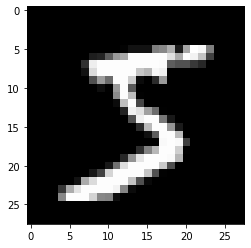

In [ ]:
# Get the first image in the training set
plt.imshow(x_train[0],cmap='gist_gray')

In [ ]:
# Get the shape of the testing set
y_train.shape

(60000,)

In [ ]:
# Get the label of the firt element in the training set
y_train[0]

5

### Normalizing the data
Normalization is scaling the data to be analyzed to a specific range such as [0.0, 1.0] to provide better results.

In [ ]:
# Normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Flatten 28*28 images to 784 verctor for each image
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[-1]))
print(x_train.shape)

(60000, 784)


In [ ]:
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[-1]))

### One Hot Encoding
 One hot encoding is a process of converting categorical data variablesso they can be provided to machine learning algorithms to improve predictions.

In [ ]:
num_classes = 10
num_features = x_train.shape[1]
n_samples = x_train.shape[0]
labels = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
labels.index(y_train[1])

0

In [ ]:
#One hot encode outputs
T_train = np.zeros(shape = (n_samples,num_classes))
for i in range(n_samples):
 ind = labels.index(y_train[i])
 T_train[i,ind] = 1

In [ ]:
T_test = np.zeros(shape = (y_test.shape[0],num_classes))
for i in range(y_test.shape[0]):
 ind = labels.index(y_test[i])
 T_test[i,ind] = 1

#  Neural network model
### MLP
Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers—the input layer, output layer and hidden layer, as shown in Figure 1.
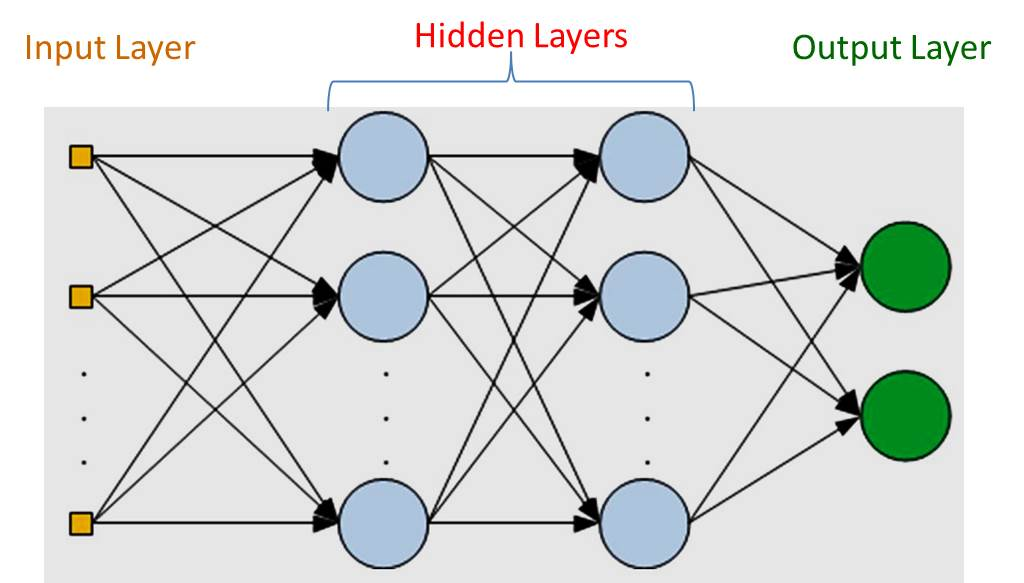
      Figure 1: Layers of Multilayer Perceptron

**The advantages of the multilayer Perceptron** are as follows:
  * Ability to learn non-linear models.
  * Ability to learn models in real time (e-learning) using
partial_fit.

**The disadvantages of Multi-Layer Perceptron (MLP)** include:
  * MLPs with hidden layers have a non-convex loss function when there is more than one local minimum. Therefore, different random weight initializations
may lead to a different validation accuracy.
  * MLP requires tuning a certain number of hyperparameters, such as the number of
hidden neurons, layers and iterations.
  * MLP is sensitive to feature scaling.

In [ ]:
# Define the MLP model
def mlp(num_classes,num_features):
 Inp = Input(shape = (num_features,))
 x1 = Dense(units = 10,activation = 'relu')(Inp)
 x = Dense(units = 10,activation = 'softmax')(x1)
 model = Model(inputs= [Inp],outputs = [x])
 return model


In [ ]:
model = mlp(num_classes,num_features)

In [ ]:
# Compile using categorical_crossentropy as a loss function
model.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [ ]:
# Fitting the model to the data
history = model.fit(x_train,T_train,validation_data = (x_test,T_test),batch_size=100,epochs = 30)

Epoch 1/30
600/600 [==============================] - 3s 3ms/step - loss: 0.7604 - accuracy: 0.7851 - val_loss: 0.3903 - val_accuracy: 0.8951
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.9028 - val_loss: 0.2980 - val_accuracy: 0.9144
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2921 - accuracy: 0.9168 - val_loss: 0.2710 - val_accuracy: 0.9237
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2686 - accuracy: 0.9236 - val_loss: 0.2592 - val_accuracy: 0.9258
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2541 - accuracy: 0.9276 - val_loss: 0.2500 - val_accuracy: 0.9273
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2444 - accuracy: 0.9303 - val_loss: 0.2466 - val_accuracy: 0.9294
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2372 - accuracy: 0.9324 - val_loss: 0.2412 - val_accuracy: 0.9300
Epoch 

#### Model Predictions

In [ ]:
pred = model.predict(x_test)
pred[10]

313/313 [==============================] - 0s 1ms/step


array([9.8980641e-01, 1.3236426e-09, 1.2833029e-03, 2.4451353e-04,
       8.1341005e-09, 3.2968381e-03, 1.7259069e-06, 4.3263235e-06,
       5.2978117e-03, 6.4931781e-05], dtype=float32)

In [ ]:
np.argmax(pred[10])

0

In [ ]:
# Display some predictions and the original values
pred_classes = [np.argmax(x) for x in pred]
orig = [np.argmax(x) for x in T_test]
print("Predicted values : ",pred_classes[:20])
print("Original values : ",orig[:20])

Predicted values :  [7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4]
Original values :  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


In [ ]:
ERR = []
for i in range(T_test.shape[0]):
 if(pred_classes[i] != orig[i]):
  ERR.append(i)

In [ ]:
# Total number of misclassified
len(ERR)

587

In [ ]:
T_test.shape

(10000, 10)

# Conclusion
**Multilayer perceptrons are a powerful tool in the field of machine learning. Using this algorithm, the prediction is false only 587 times out of 10000.**

